# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *{Sukmanova Elena}*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustrate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degree to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

## Solutions:

In [1]:
# let's import some libraries
import scipy.signal as sc
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
%matplotlib inline

#### 1. Generate networks according to the models above ($N > 1000$ nodes)

In [2]:
## took as a basis barabasi_albert_graph() function from networkx library

# return m unique elements from sequence
def random_subset(seq, m):
    targets = set()
    while len(targets) < m:
        x = np.random.choice(seq)
        targets.add(x)
    return targets

# function that generates network according to the model A
def model_A(n, m):
    # add m initial nodes
    G = nx.empty_graph(m)
    # target nodes for new edges
    targets = list(range(m))
    # list of existing unique nodes
    existing_nodes = list(range(m))
    # start adding the other n-m nodes
    source = m
    while source < n:
        # add m edges from new node 'source' to targets
        G.add_edges_from(zip([source]*m, targets))
        # add the new node 'source' to existing nodes list 
        existing_nodes.extend([source])
        # choose uniformly m unique nodes from the existing nodes (without preferential attachement)
        targets = random_subset(existing_nodes, m)
        # create next node
        source += 1
    return G

# function that generates network according to the model B
def model_B(n, m):
    # add n fix total number of nodes
    G = nx.empty_graph(n)
    # list of nodes (number of node repeats = node degree + 1)
    repeated_nodes = list(range(n))
    # let's visit every node
    for i in range(n):
        # make list of potential nodes to form edges
        potential_targets = [x for x in repeated_nodes if x != i and x not in G.neighbors(i)]
        # check how many potential targets we have
        if len(set(potential_targets)) < m:
            m_fact = len(set(potential_targets))
        else:
            m_fact = m
        # choose uniformly m_fact unique nodes from the potential targets (with preferential attachement)
        targets = random_subset(potential_targets, m_fact)
        # add m_fact edges from i-node to targets
        G.add_edges_from(zip([i]*m_fact, targets))
        # add nodes to the repeated_nodes list for each new edge just created
        repeated_nodes.extend([i]*m_fact)
        repeated_nodes.extend(targets)
    return G

#### 2. Compute CDF/PDF, describe the distribution and compute\describe its properties.

#### and

#### 4. Is scale-free property conserved in these models?

In [3]:
# compute CDF/PDF and its properties
def PDF_CDF_task1(model_name, n, m):
    if model_name == 'A':
        G = model_A(n, m)
    elif model_name == 'B':
        G = model_B(n, m)
    nodes_degree = list(G.degree().values())
    number_of_nodes_with_k_links = np.bincount(nodes_degree)
    pdf = number_of_nodes_with_k_links.astype(float) / n
    cdf = np.cumsum(pdf)
    average_path_length = nx.average_shortest_path_length(G)
    average_clustering_coeff = nx.average_clustering(G)
    
    # compute pdf and cdf for full Barabasi-Albert model
    G_BA = nx.barabasi_albert_graph(n, m)
    nodes_degree_BA = list(G_BA.degree().values())
    number_of_nodes_with_k_links_BA = np.bincount(nodes_degree_BA)
    pdf_BA = number_of_nodes_with_k_links_BA.astype(float) / n
    cdf_BA = np.cumsum(pdf_BA)
    
    # plot pdf and cdf for both models
    plt.figure(figsize=(20,5))
    plt.suptitle('Model_{} with n = {}, m = {} in comparison with full Barabasi-Albert model.\
              \nAverage path length = {}.\nAverage clustering coeff = {}.'.format(model_name, n, m, average_path_length, average_clustering_coeff))
    
    plt.subplot(1,2,1)
    plt.loglog(np.arange(0, len(pdf)), pdf, 'b.', label = 'Model_{}'.format(model_name))
    plt.loglog(np.arange(0, len(pdf_BA)), pdf_BA, 'r.', label = 'full Barabasi-Albert model')
    plt.legend(loc = 'upper right', shadow = True)
    plt.title('PDF')
    plt.xlabel('node degrees')
    plt.ylabel('PDF')
    
    plt.subplot(1,2,2)
    plt.loglog(np.arange(0, len(cdf)), cdf, 'b.', label = 'Model_{}'.format(model_name))
    plt.loglog(np.arange(0, len(cdf_BA)), cdf_BA, 'r.', label = 'full Barabasi-Albert model')
    plt.legend(loc = 'upper right', shadow = True)
    plt.title('CDF')
    plt.xlabel('node degrees')
    plt.ylabel('CDF')

    plt.subplots_adjust(top = 0.85)
    
# analyse results with respect to various parameter settings
def analysis_task1_2(model_name):
    for m in range(10, 30, 10):
        for n in range(1000, 2500, 500):
            PDF_CDF_task1(model_name, n, m)

#### Model A:

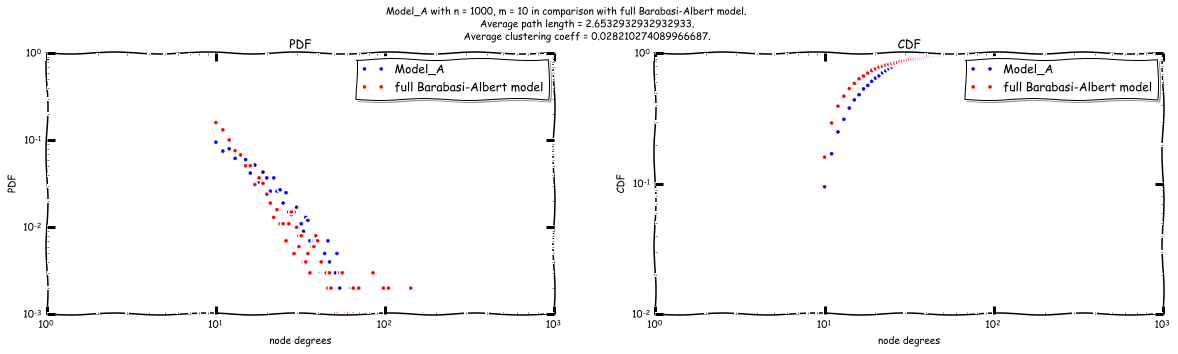

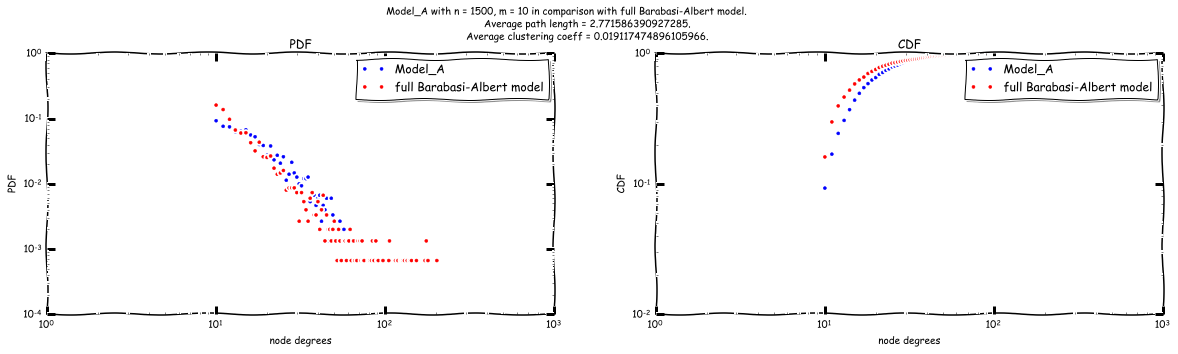

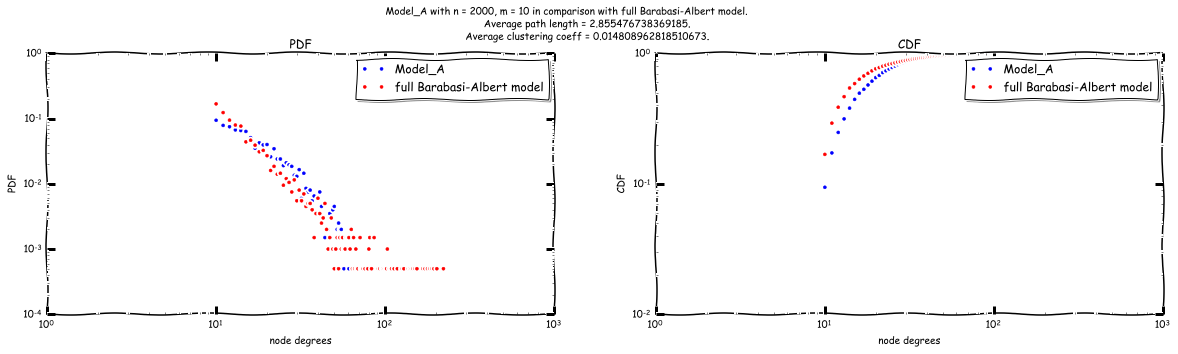

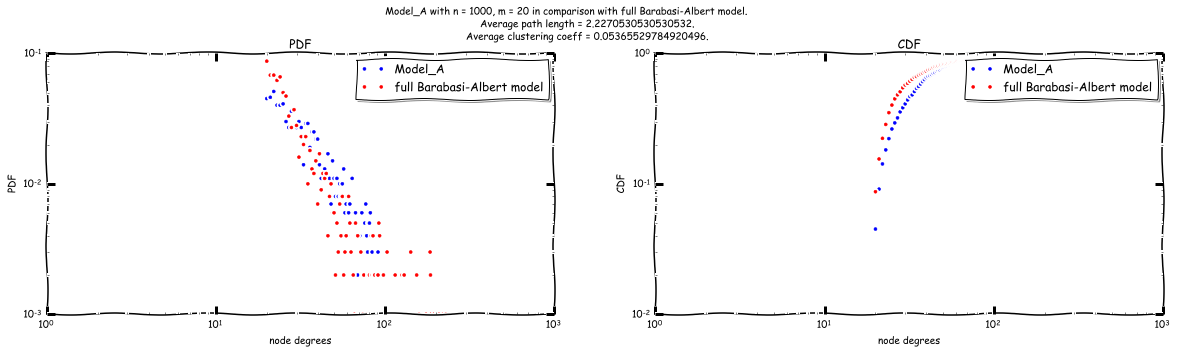

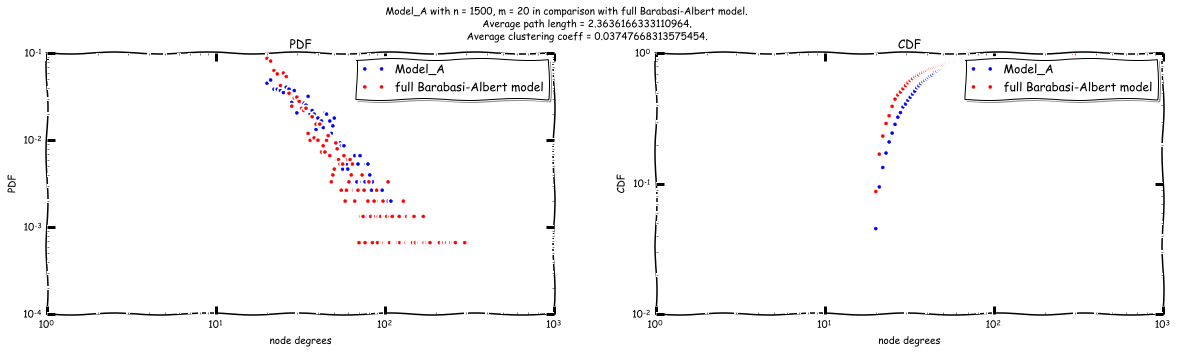

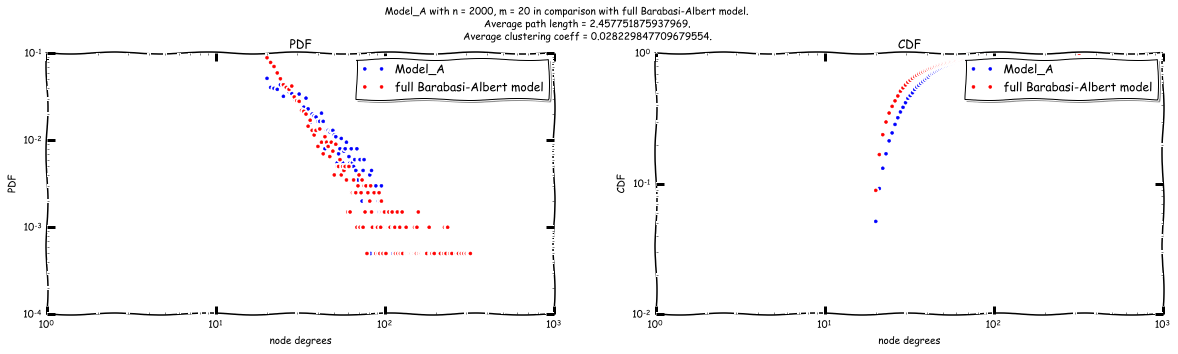

In [4]:
analysis_task1_2('A')

In model A expected i-node degree at t step - $k_i(t)$ - increases logarithmically with time, a much slower increase than the power law. Consequently the degree distribution becomes exponential, as we can see from plots above. As an exponential function decays much faster than a power law, it does not support hubs. Therefore the lack of preferential attachment eliminates the networks scale-free character and the hubs.

We can also observe that increase of m edges influences the slope of distribution function - the smaller m, the more sloping distribution function we get.

#### Model B:

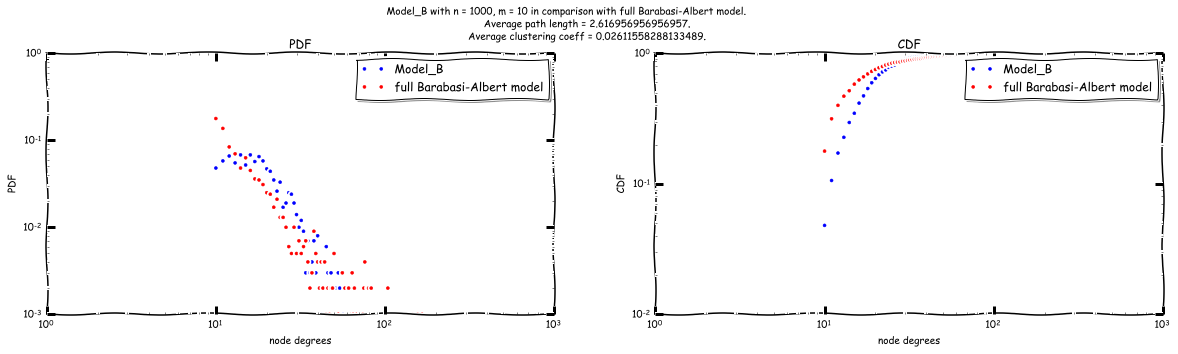

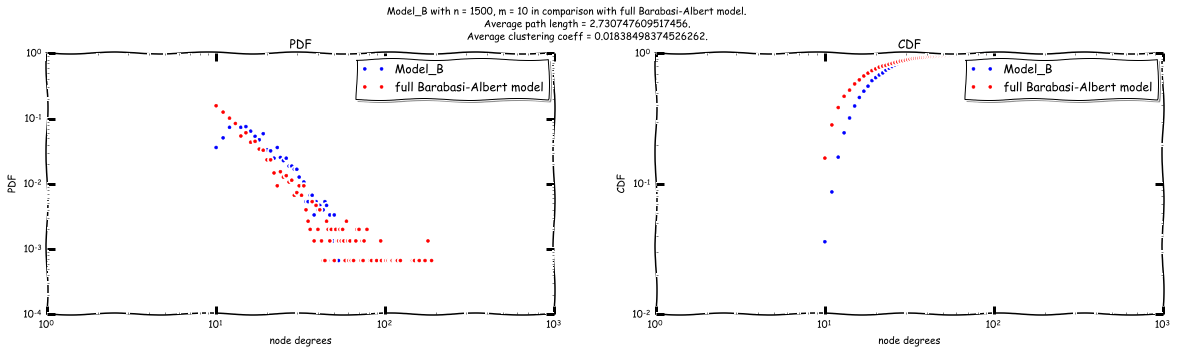

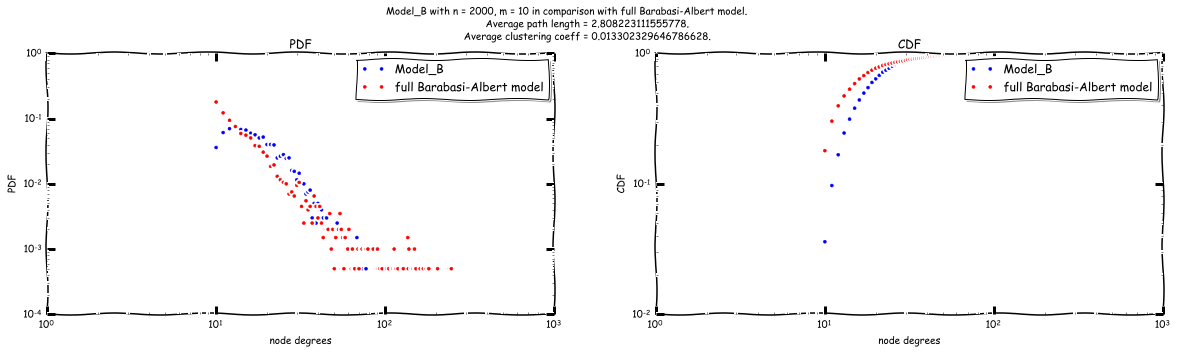

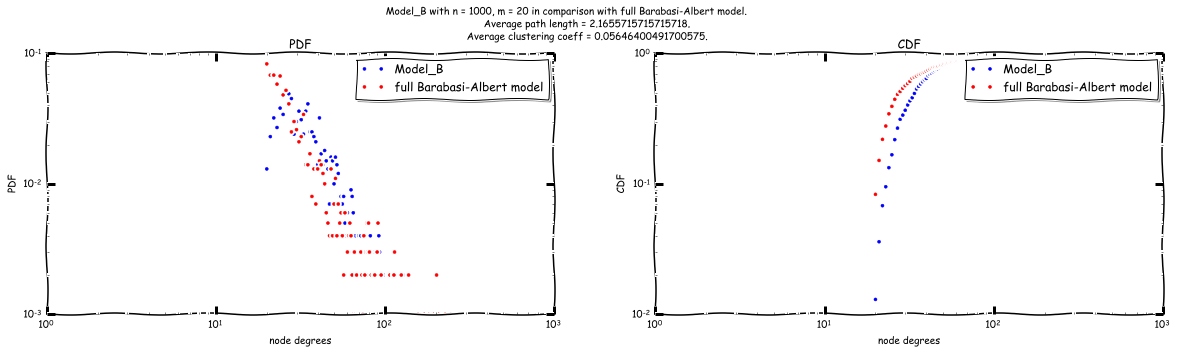

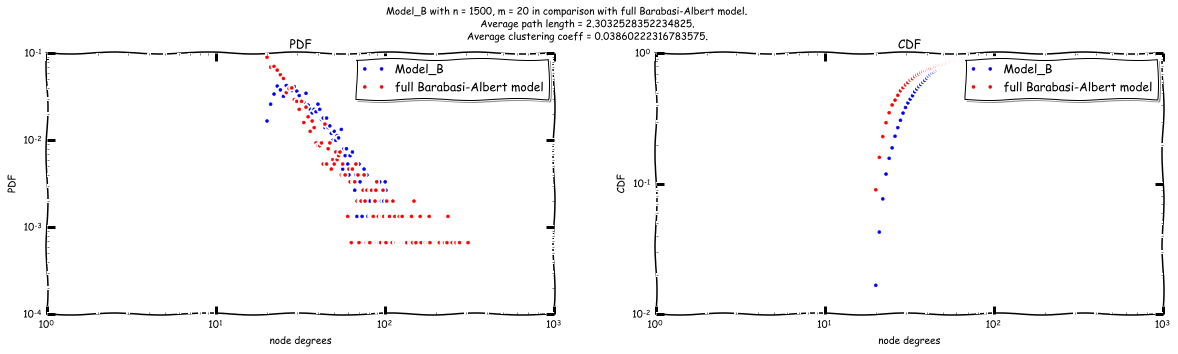

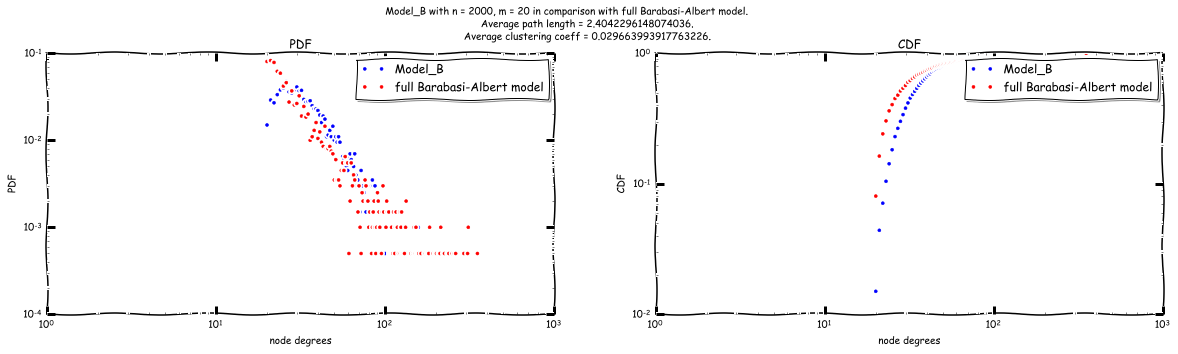

In [6]:
analysis_task1_2('B')

In model B the number of nodes remains constant during the networks evolution, but the number of links increases linearly with time. As a result expected i-node degree at t step - $k_i(t)$ - also increases linearly with time. At early times, degree distribution can resemble power law. But in process of time degree distribution becomes peaked (similar to Gaussian law) and finally turns into a complete graph in which all nodes have degree $k_{max} = n-1$. Therefore, in the absence of growth the network is not stationary, becoming a complete graph with time.

In this case we can also observe that increase of m edges influences the slope of distribution function - the smaller m, the more sloping distribution function we get.

In summary, the failure of models A and B to reproduce the empirically observed scale-free distribution indicates that growth and preferential attachment are simultaneously needed for the emergence of the scale-free property.

#### 3. Illustrate the following dependencies: 
* average path length to the number of nodes
* average clustering coefficient to the number of nodes
* average node degree to the nodes "age"

In [7]:
def analysis_task1_3(model_name, m):
    average_path_length = []
    average_clustering_coeff = []
    plt.figure(figsize=(15,5))
    colours = ['b', 'g', 'r', 'y', 'k', 'm']
    i = 0
    for n in range(1500, 3300, 300):
        if model_name == 'A':
            G = model_A(n, m)
            # build actual 'Dependency of node degree to the node age'
            plt.subplot(1,2,1)
            plt.plot(list(G.degree().keys()), list(G.degree().values()), colours[i]+'.', label = 'n = {}'.format(n))
            plt.legend(loc = 'upper right', shadow = True)
            plt.title('Actual dependency of node degree to the node age')
            plt.xlabel('node age')
            plt.ylabel('node degree')
            # build smooth 'Dependency of node degree to the node age'
            plt.subplot(1,2,2)
            x = list(G.degree().keys())
            yhat = sc.savgol_filter(list(G.degree().values()), 1001, 3)
            plt.plot(x, yhat, colours[i], label = 'n = {}'.format(n))
            plt.legend(loc = 'upper right', shadow = True)
            plt.title('Smooth dependency of node degree to the node age')
            plt.xlabel('node age')
            plt.ylabel('node degree')
            i += 1
        elif model_name == 'B':
            G = model_B(n, m)
        average_path_length.append(nx.average_shortest_path_length(G))
        average_clustering_coeff.append(nx.average_clustering(G))
           
    # build 'Dependency of average path length to the number of nodes'
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(1500, 3300, 300), average_path_length)
    plt.title('Dependency of average path length to the number of nodes')
    plt.xlabel('number of nodes')
    plt.ylabel('average path length')
    
    # build 'Dependency of average clustering coefficient to the number of nodes'
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(1500, 3300, 300), average_clustering_coeff)
    plt.title('Dependency of average clustering coefficient to the number of nodes')
    plt.xlabel('number of nodes')
    plt.ylabel('average clustering coefficient')

#### Model A:

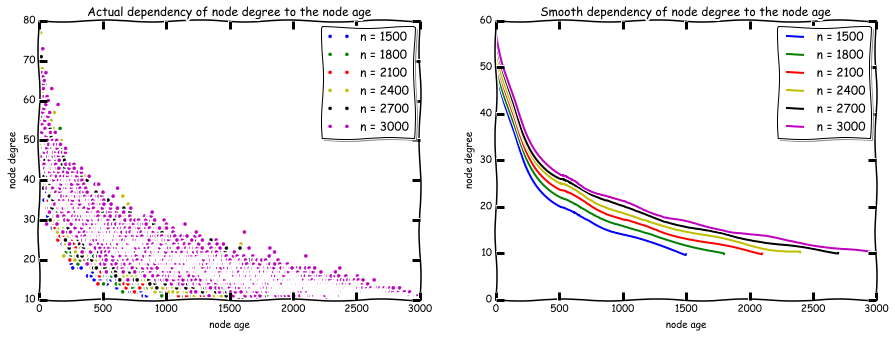

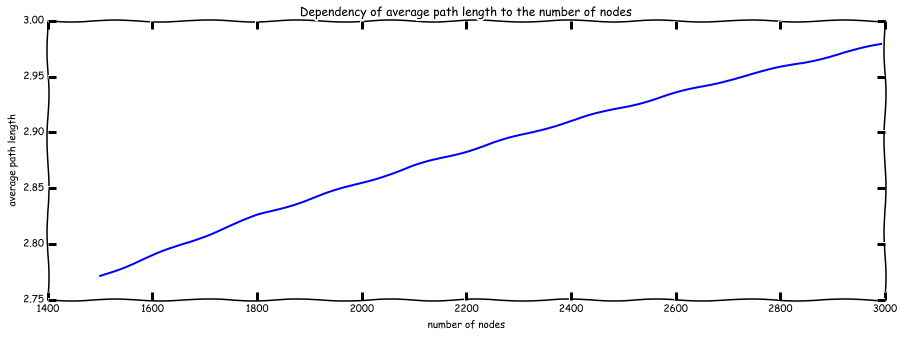

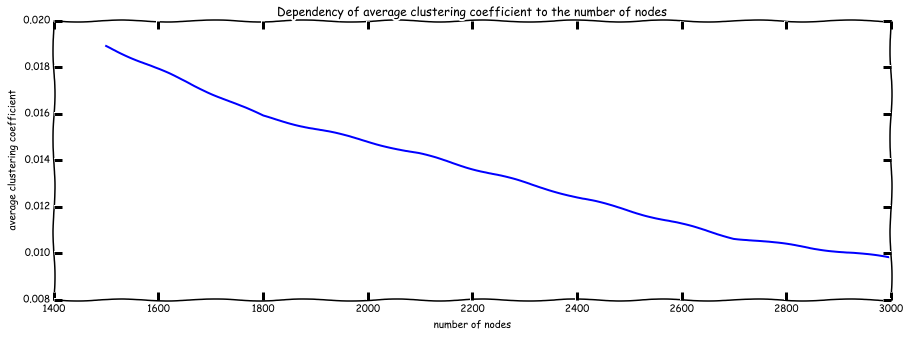

In [8]:
analysis_task1_3('A', 10)

Illustration of dependency of average node degree to the nodes 'age' was made similarly to one we explored on lectures (snapshot at different time steps). In general this function can look like exponential one (as the oldest nodes appear more frequently for target selection exclusively due to their age than younger ones), but as we have no preferential attachment scatter of nodes degree is very high.

From plots above we can also see following dependencies: the higher number of nodes, the higher average path length we get and the higher number of nodes, the lower average clustering coefficient we get.

#### Model B:

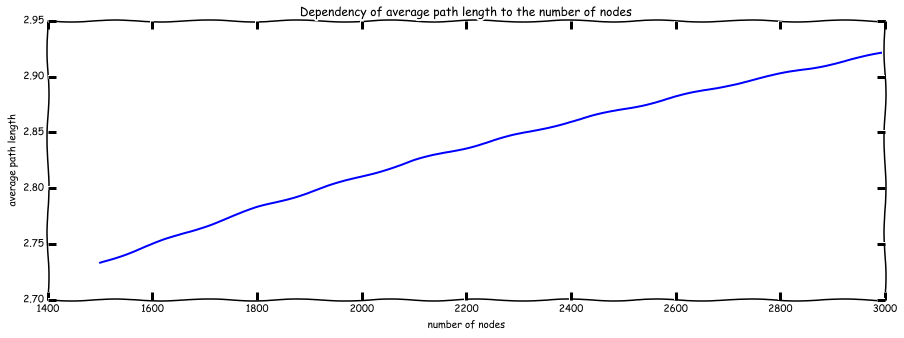

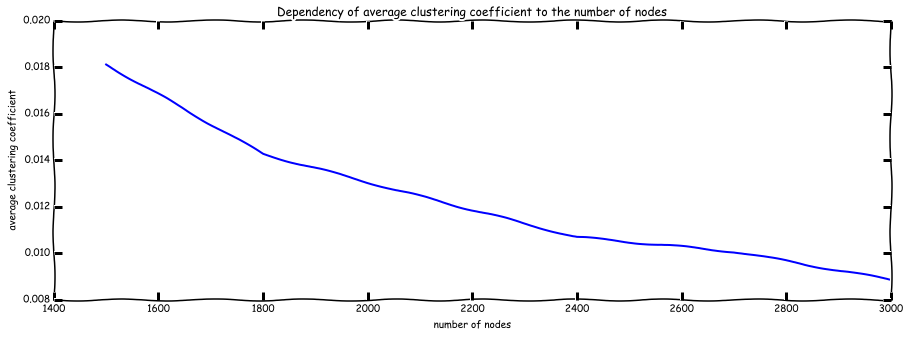

In [9]:
analysis_task1_3('B', 10)

I didn't plot dependency of average node degree to the nodes 'age', because in model B all nodes have the same age.

From plots above we can see following dependencies (as in model A): the higher number of nodes, the higher average path length we get and the higher number of nodes, the lower average clustering coefficient we get.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

## Solutions:

#### 1. Generate  graphs based on the model ($N > 1000$ nodes)

In [10]:
# function that generates network according to the Vertex copying model
def vertex_copying_model(n, q, directed):
    # for example, starting state is defined by erdos_renyi_graph() function with n = 10, p = 0.3
    G = nx.erdos_renyi_graph(10, 0.3, None, directed)
    # start adding the other n-10 nodes
    source = 10
    while source < n:
        # select randomly vertex from already existing vertices
        i = np.random.choice(G.nodes())
        # make dictionary for every edge of i vertex with random probability
        dict = {}
        for j in G.neighbors(i):
            dict[j] = np.random.random()
        # find edge that will be copied and copy them
        copied = [k for k, v in dict.items() if v <= q]
        G.add_edges_from(zip([source]*len(copied), copied))
        # find edge that will be rewired
        rewired = [k for k, v in dict.items() if v > q]
        # find potential targets for 'source' node for rewiring
        potential_nodes = [x for x in G.nodes() if x != source and x not in G.neighbors(i)]
        # check how many potential nodes we have
        if len(potential_nodes) < len(rewired):
            r_fact = len(potential_nodes)
        else:
            r_fact = len(rewired)
        # choose uniformly targets for rewiring and rewire 'source' node with them
        targets = random_subset(potential_nodes, r_fact)
        G.add_edges_from(zip([source]*r_fact, targets))
        # create next node
        source += 1  
    return G

#### 2. Compute CDF/PDF, describe the distribution and compute\describe its properties.

In [11]:
# compute CDF/PDF and its properties
def PDF_CDF_task2(n, q, directed):
    G = vertex_copying_model(n, q, directed)
    if directed == True:
        in_nodes_degree = list(G.in_degree().values())
        out_nodes_degree = list(G.out_degree().values())
        # as average_clustering algorithm is not defined for directed graphs, let's find transitivity instead
        average_clustering_coeff = nx.transitivity(G)
    elif directed == False:
        in_nodes_degree = list(G.degree().values())
        out_nodes_degree = list(G.degree().values())
        average_clustering_coeff = nx.average_clustering(G)
    
    average_path_length = nx.average_shortest_path_length(G)
    
    # compute pdf and cdf for in_nodes_degree
    in_number_of_nodes_with_k_links = np.bincount(in_nodes_degree)
    in_pdf = in_number_of_nodes_with_k_links.astype(float) / n
    in_cdf = np.cumsum(in_pdf)
    
    # compute pdf and cdf for out_nodes_degree
    out_number_of_nodes_with_k_links = np.bincount(out_nodes_degree)
    out_pdf = out_number_of_nodes_with_k_links.astype(float) / n
    out_cdf = np.cumsum(out_pdf)
    
    # plot pdf and cdf
    plt.figure(figsize=(20,5))
    plt.suptitle('Vertex copying model with n = {}, q = {} and directed = {}.\
              \nAverage path length = {}.\nAverage clustering coeff = {}.'.format(n, q, directed, average_path_length, average_clustering_coeff))
    
    plt.subplot(1,2,1)
    plt.loglog(np.arange(0, len(in_pdf)), in_pdf, 'b.')
    plt.loglog(np.arange(0, len(out_pdf)), out_pdf, 'r.')
    plt.title('PDF')
    plt.xlabel('in/out node degrees')
    plt.ylabel('PDF')
    
    plt.subplot(1,2,2)
    plt.loglog(np.arange(0, len(in_cdf)), in_cdf, 'b.')
    plt.loglog(np.arange(0, len(out_cdf)), out_cdf, 'r.')
    plt.title('CDF')
    plt.xlabel('in/out node degrees')
    plt.ylabel('CDF')

    plt.subplots_adjust(top = 0.85)
    
# analyse results with respect to various parameter settings
def analysis_task2_2(directed):
    for q in np.arange(0.2, 1, 0.3):
        for n in range(1500, 3500, 1000):
            PDF_CDF_task2(n, q, directed)

#### Vertex copying model for directed networks

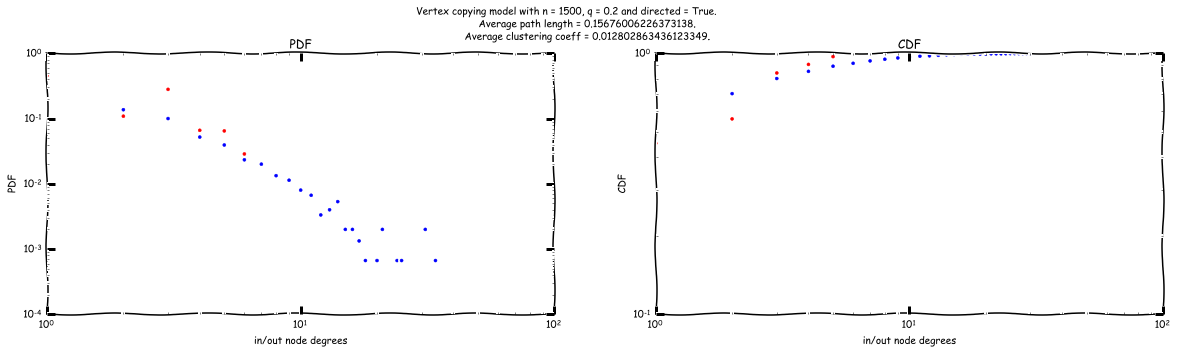

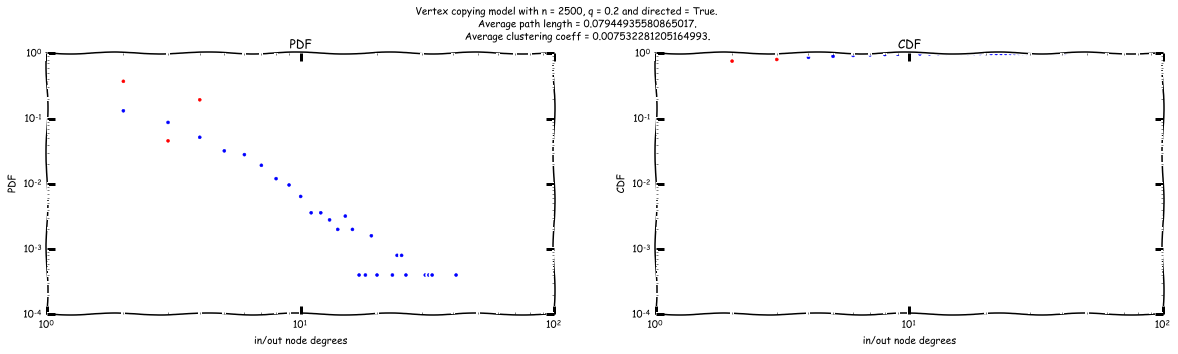

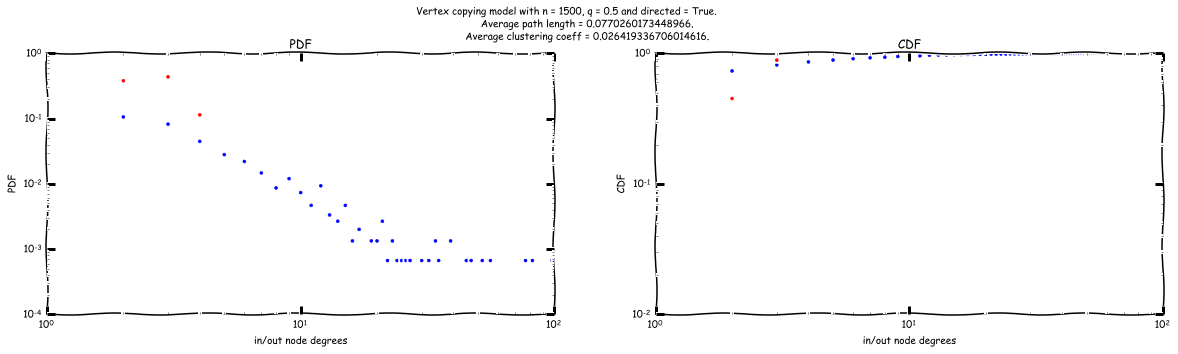

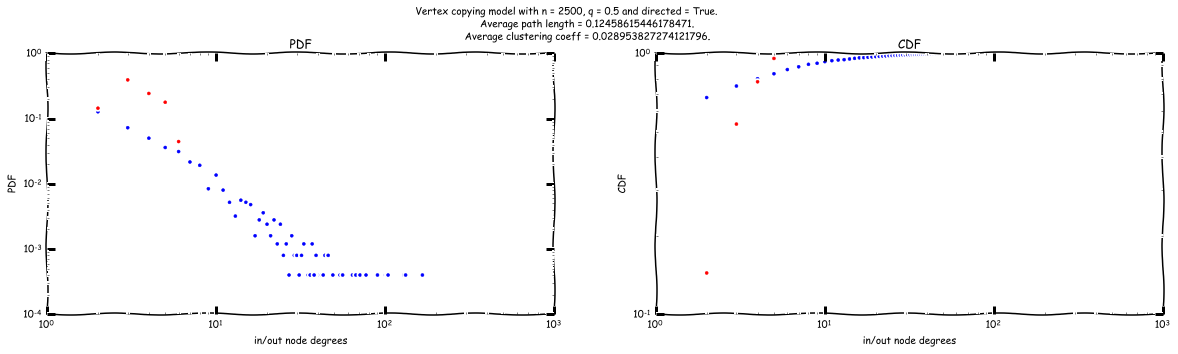

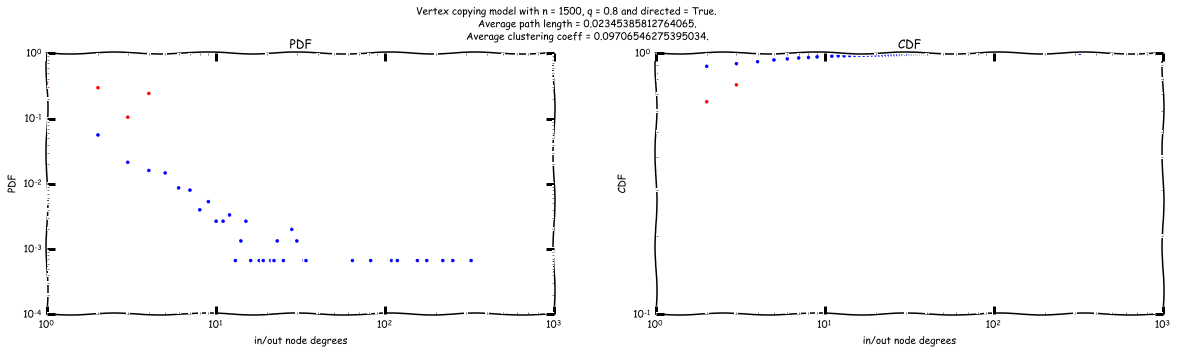

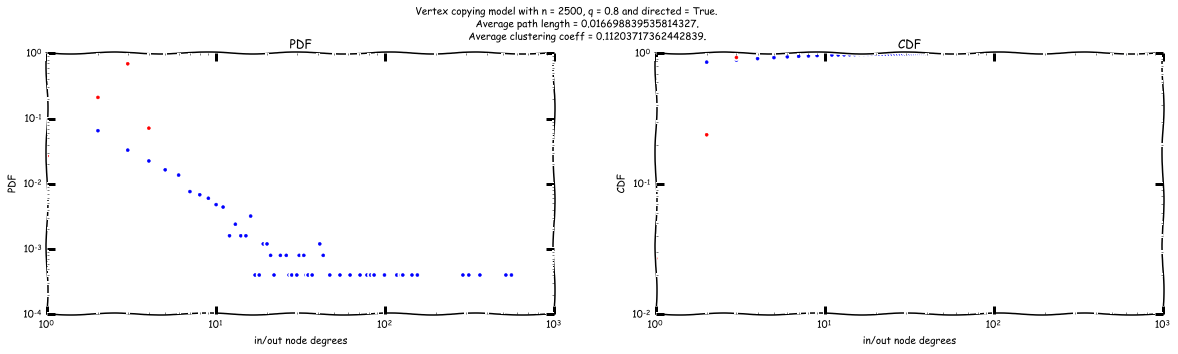

In [12]:
analysis_task2_2(directed = True)

From plots above we can see that in-node degree distribution in general resemble power law. And out-node degree is equal only to several values, that we got in start step (G = nx.erdos_renyi_graph(10, 0.3, None, True)).

#### Vertex copying model for undirected networks

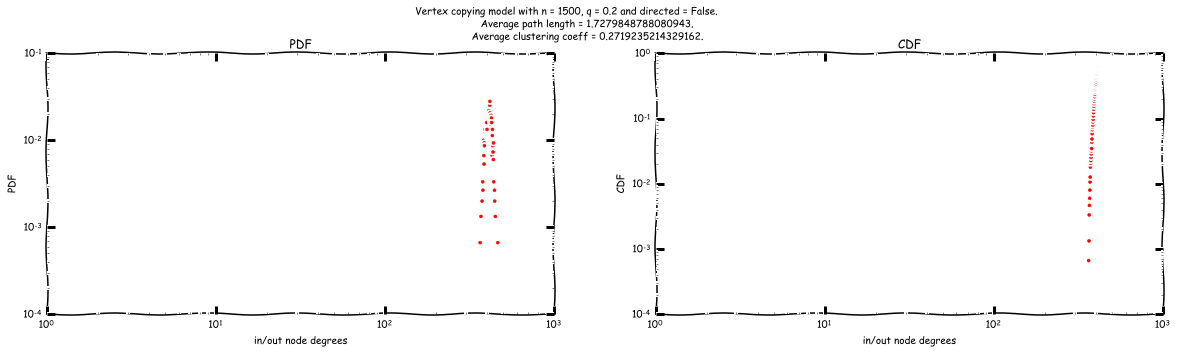

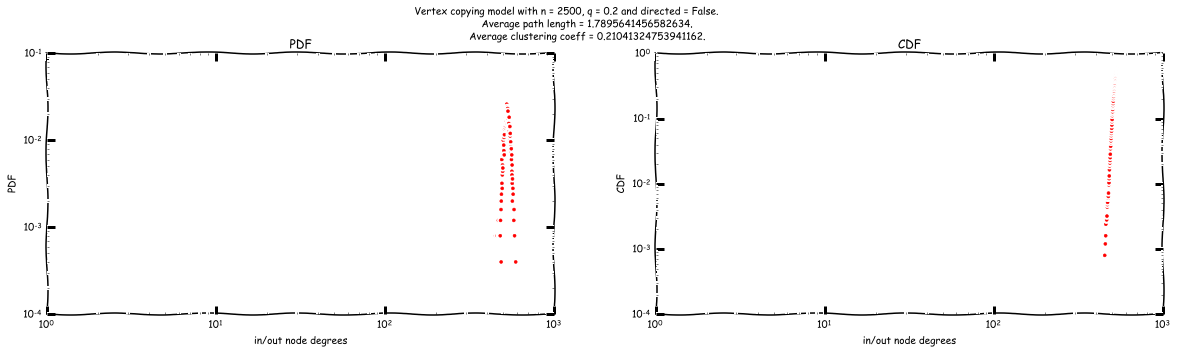

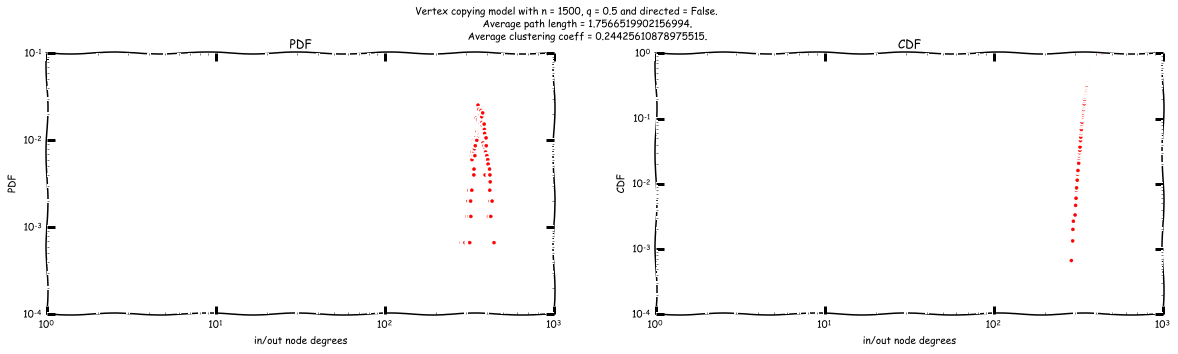

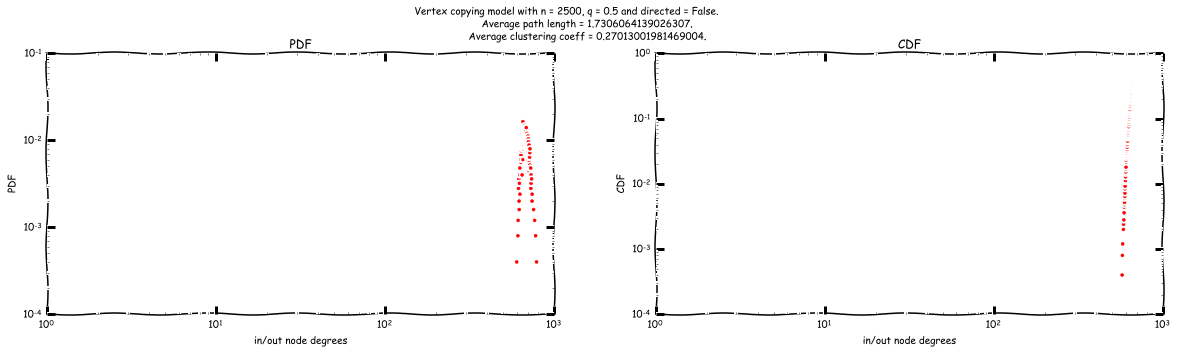

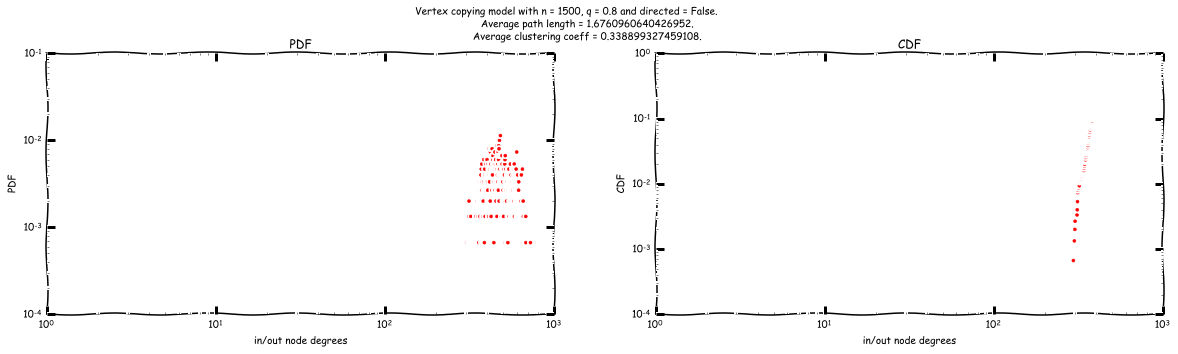

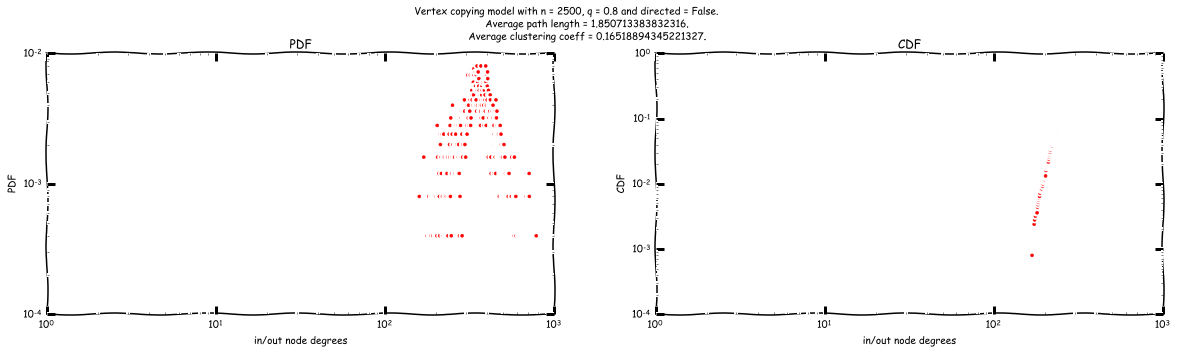

In [13]:
analysis_task2_2(directed = False)

From plots above we can see that degree distribution is peaked, with increase of q we get higher scatter of nodes degree.

#### 3. Illustrate the following dependencies: 
* average path length to the number of nodes
* average clustering coefficient to the number of nodes
* average node degree to the nodes "age"

In [17]:
def analysis_task2_3(q, directed):
    average_path_length = []
    average_clustering_coeff = []
    plt.figure(figsize=(15,5))
    colours = ['b', 'g', 'r', 'y', 'k', 'm']
    i = 0
    for n in range(1500, 3300, 300):
        G = vertex_copying_model(n, q, directed)
        if directed == True:
            node_degree = G.in_degree()
            average_clustering_coeff.append(nx.transitivity(G))
        elif directed == False:
            node_degree = G.degree()
            average_clustering_coeff.append(nx.average_clustering(G))
        average_path_length.append(nx.average_shortest_path_length(G))
        # build actual 'Dependency of node degree to the node age'
        plt.subplot(1,2,1)
        plt.plot(list(node_degree.keys()), list(node_degree.values()), colours[i]+'.', label = 'n = {}'.format(n))
        plt.legend(loc = 'upper right', shadow = True)
        plt.title('Actual dependency of node degree to the node age')
        plt.xlabel('node age')
        plt.ylabel('node degree')
        # build smooth 'Dependency of node degree to the node age'
        plt.subplot(1,2,2)
        x = list(node_degree.keys())
        yhat = sc.savgol_filter(list(node_degree.values()), 1001, 3)
        plt.plot(x, yhat, colours[i], label = 'n = {}'.format(n))
        plt.legend(loc = 'upper right', shadow = True)
        plt.title('Smooth dependency of node degree to the node age')
        plt.xlabel('node age')
        plt.ylabel('node degree')
        i += 1
           
    # build 'Dependency of average path length to the number of nodes'
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(1500, 3300, 300), average_path_length)
    plt.title('Dependency of average path length to the number of nodes')
    plt.xlabel('number of nodes')
    plt.ylabel('average path length')
    
    # build 'Dependency of average clustering coefficient to the number of nodes'
    plt.figure(figsize=(15,5))
    plt.plot(np.arange(1500, 3300, 300), average_clustering_coeff)
    plt.title('Dependency of average clustering coefficient to the number of nodes')
    plt.xlabel('number of nodes')
    plt.ylabel('average clustering coefficient')

#### Vertex copying model for directed networks

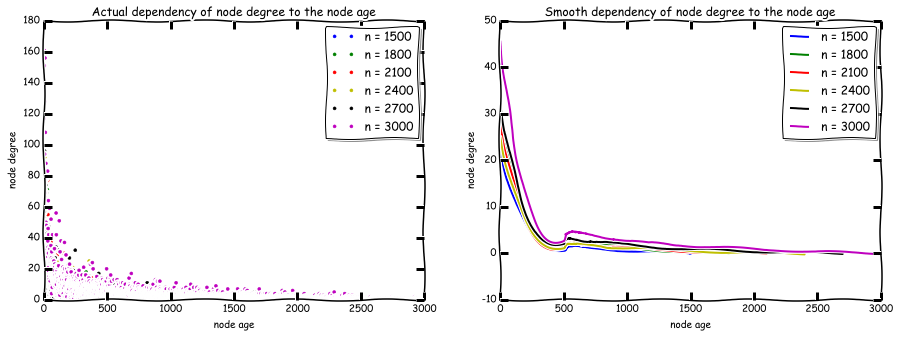

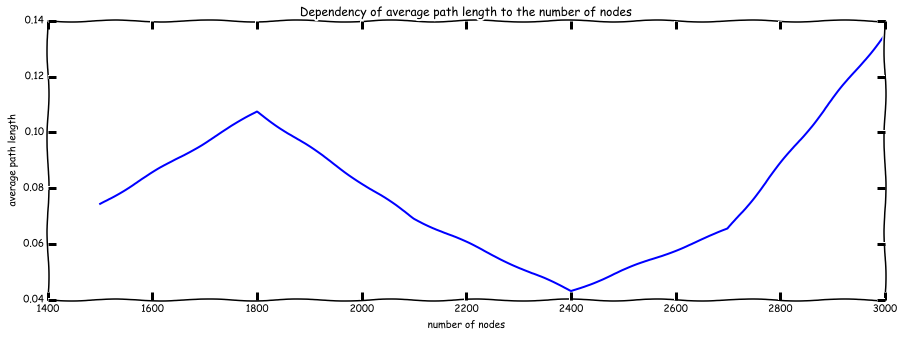

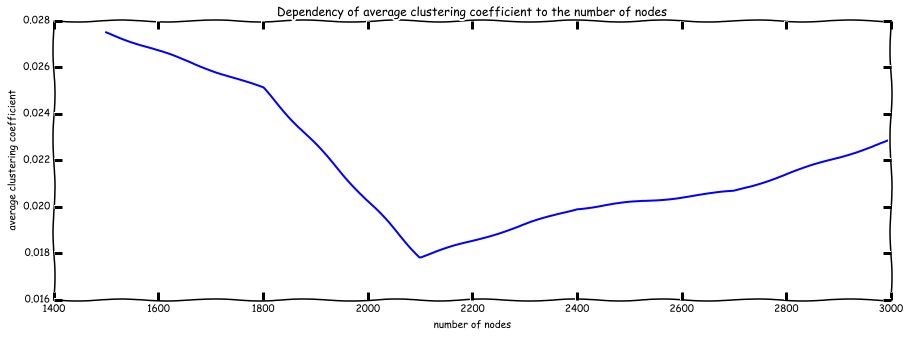

In [18]:
analysis_task2_3(0.5, directed = True)

Dependency of node degree to node 'age' was made for in-node degree (as dependency of out-node degree to node 'age' will look like several lines that are equal to several values of out-node degrees, that we got in start step, and are parallel to node 'age' axis). With increase of q this function will look more like exponential one as the oldest nodes get higher probability to copy more edges in them.

From plots above we can also see that it's very difficult to say something certain about dependency of average path length to the number of nodes and dependency of average clustering coefficient to the number of nodes (as average_clustering algorithm is not defined for directed graphs, we calculated transitivity instead).

#### Vertex copying model for undirected networks

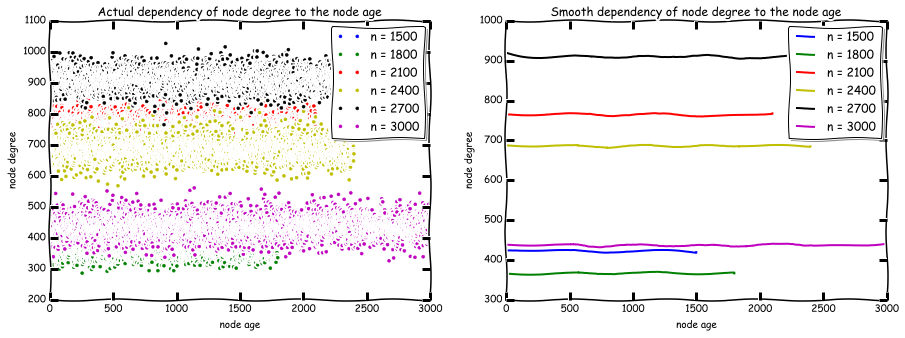

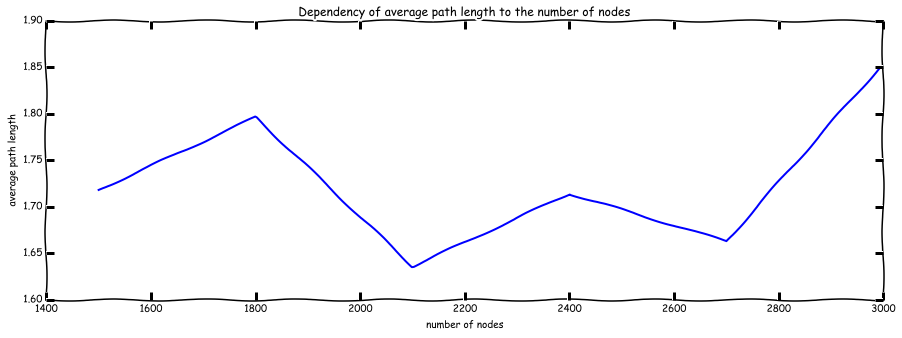

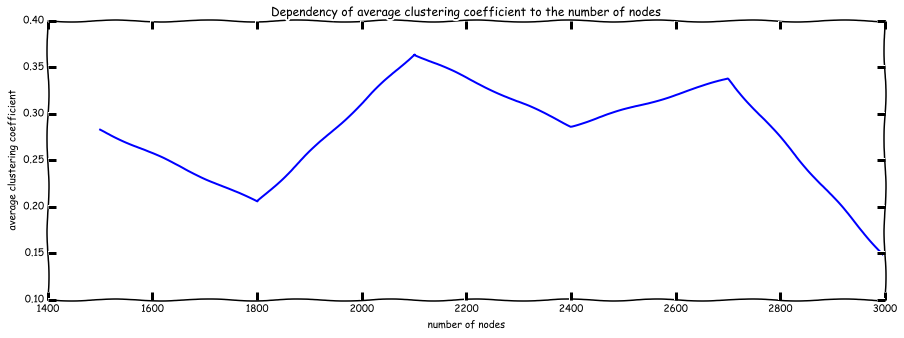

In [19]:
analysis_task2_3(0.5, directed = False)

Dependency of average node degree to the nodes 'age' illustrates that every new node enters in network with some existing before it degree, so this dependency looks like parallel to node 'age' axis line with some diameter variation.

From plots above we can also see that it's very difficult to say something certain about dependency of average path length to the number of nodes and dependency of average clustering coefficient to the number of nodes.